In [31]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df=pd.read_csv('/content/FinalBalancedDataset.csv')
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [33]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


<Axes: xlabel='Toxicity', ylabel='count'>

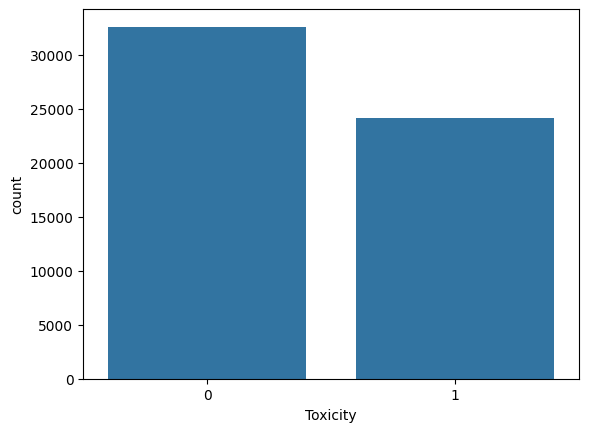

In [34]:
sns.countplot(x='Toxicity', data=df)

In [35]:
df['Toxicity'].value_counts()

Toxicity
0    32592
1    24153
Name: count, dtype: int64

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


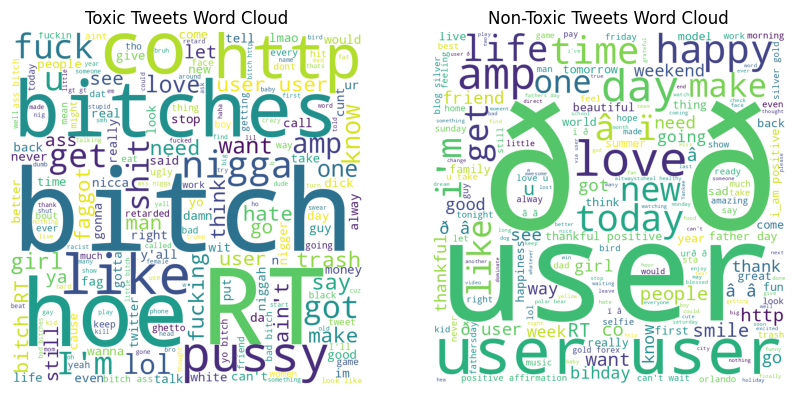

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

# Filter toxic and non-toxic tweets
toxic_tweets = df[df['Toxicity'] == 1]['tweet'].str.cat(sep=' ')
non_toxic_tweets = df[df['Toxicity'] == 0]['tweet'].str.cat(sep=' ')

# Generate word clouds
toxic_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(toxic_tweets)
non_toxic_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(non_toxic_tweets)

# Plot word clouds
plt.figure(figsize = (10, 10), facecolor = None)
plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud)
plt.axis("off")
plt.title('Toxic Tweets Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wordcloud)
plt.axis("off")
plt.title('Non-Toxic Tweets Word Cloud')

plt.show()


In [36]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
tweets=df.tweet
tweets

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
56740    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741    you've gone and broke the wrong heart baby, an...
56742    young buck wanna eat!!.. dat nigguh like I ain...
56743                youu got wild bitches tellin you lies
56744    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 56745, dtype: object

# **Toeknization using TweetTokenizer**

In [38]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
tweets


0        @user when a father is dysfunctional and is so...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model i love u take with u all the time in ur...
4                     factsguide : society now #motivation
                               ...                        
56740    you's a muthaf * * * in lie “ @LifeAsKing : @2...
56741    you've gone and broke the wrong heart baby , a...
56742    young buck wanna eat ! ! .. dat nigguh like I ...
56743                youu got wild bitches tellin you lies
56744    ~ ~ Ruffled | Ntac Eileen Dahlia - Beautiful c...
Name: tweet, Length: 56745, dtype: object

# **Removing Special Characters**

In [39]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ', regex=True)
tweets

0         user when a father is dysfunctional and is so...
1         user user thanks for lyft credit i can t use ...
2                                      bihday your majesty
3           model i love u take with u all the time in ur 
4                        factsguide society now motivation
                               ...                        
56740    you s a muthaf in lie LifeAsKing 20 Pearls cor...
56741    you ve gone and broke the wrong heart baby and...
56742    young buck wanna eat dat nigguh like I aint fu...
56743                youu got wild bitches tellin you lies
56744     Ruffled Ntac Eileen Dahlia Beautiful color co...
Name: tweet, Length: 56745, dtype: object

# **Lemmatizing and converting to Lowercase**

In [40]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lem=WordNetLemmatizer()
tweets = tweets.apply(lambda x:[lem.lemmatize(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0        user when a father is dysfunctional and is so ...
1        user user thanks for lyft credit i can t use c...
2                                      bihday your majesty
3            model i love u take with u all the time in ur
4                        factsguide society now motivation
                               ...                        
56740    you s a muthaf in lie lifeasking 20 pearl core...
56741    you ve gone and broke the wrong heart baby and...
56742    young buck wanna eat dat nigguh like i aint fu...
56743                   youu got wild bitch tellin you lie
56744    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 56745, dtype: object

# **Removing Stopwords**

In [41]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in word_tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

0        user father dysfunctional selfish drag kid dys...
1        user user thanks lyft credit use cause offer w...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
56740    muthaf lie lifeasking 20 pearl corey emanuel r...
56741      gone broke wrong heart baby drove redneck crazy
56742    young buck wan na eat dat nigguh like aint fuc...
56743                       youu got wild bitch tellin lie
56744    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 56745, dtype: object

# **Vectorization**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<56745x61409 sparse matrix of type '<class 'numpy.float64'>'
	with 464973 stored elements in Compressed Sparse Row format>

# **Model Creation**

In [43]:
print(data)

  (0, 46677)	0.28979237259864343
  (0, 17874)	0.47532033803231866
  (0, 30734)	0.25963258711606985
  (0, 17315)	0.4078218861159554
  (0, 47924)	0.38241568869784737
  (0, 17875)	0.4930868057581484
  (0, 19970)	0.23177766270222458
  (0, 56854)	0.11517788002044213
  (1, 22672)	0.3578315646646748
  (1, 16507)	0.3712065508291966
  (1, 41452)	0.3483418609592771
  (1, 57049)	0.2829950118515611
  (1, 58849)	0.3409810749092635
  (1, 39764)	0.2700013799307777
  (1, 11485)	0.19847321964083586
  (1, 56843)	0.213282639395144
  (1, 14293)	0.2787327335783393
  (1, 33977)	0.33496687479475523
  (1, 53326)	0.1967636778040588
  (1, 56854)	0.17341686321729702
  (2, 34336)	0.8689137524627031
  (2, 8483)	0.4949635246977137
  (3, 56783)	0.4859205042815438
  (3, 54381)	0.4021778221725776
  (3, 52500)	0.4518636290707734
  :	:
  (56742, 4411)	0.2991369645613797
  (56742, 16495)	0.3291717090119457
  (56742, 37570)	0.2394058600870258
  (56742, 32627)	0.17356119584453394
  (56743, 60905)	0.5792617844768742
  (5674

In [44]:
data.shape

(56745, 61409)

In [45]:
y=df['Toxicity'].values
y

array([0, 0, 0, ..., 1, 1, 0])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=42)


In [20]:
x_train

<39721x56155 sparse matrix of type '<class 'numpy.float64'>'
	with 326989 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [50]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

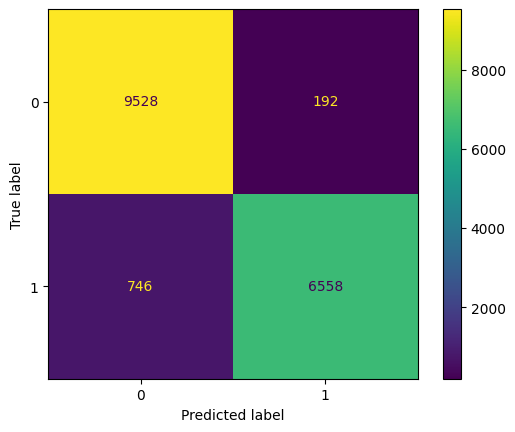

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


In [60]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9720
           1       0.97      0.90      0.93      7304

    accuracy                           0.94     17024
   macro avg       0.95      0.94      0.94     17024
weighted avg       0.95      0.94      0.94     17024



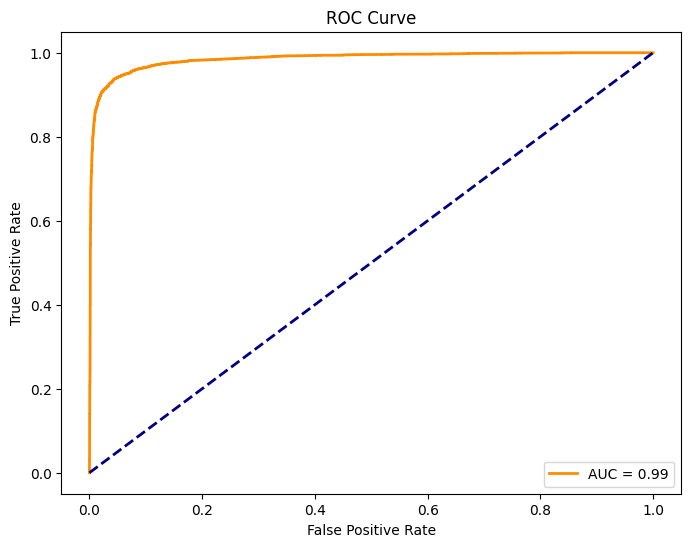

In [67]:
from sklearn.metrics import roc_curve, auc
y_score = model.decision_function(x_test)
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


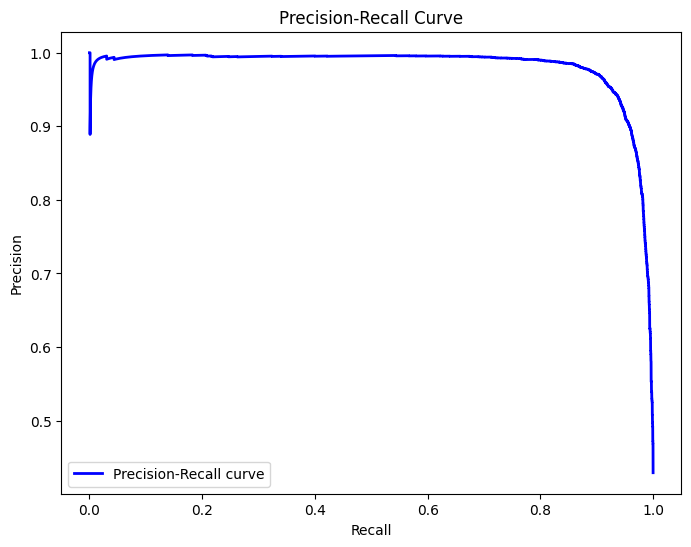

In [68]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
